To improve lives of dairy cows researchers examined 3 types of food. They wanted to assess cows performance for one food over another.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
a = pd.Series({'Bessie': 2, 'Frank': 4, 'Slim': 3}, name='A')
b = pd.Series({'Bob': 6, 'Red': 5, 'Pippin': 7}, name='B')
c = pd.Series({'Sam': 8,  'Merrry': 9, 'Chip': 10}, name='C')

a, b, c

(Bessie    2
 Frank     4
 Slim      3
 Name: A, dtype: int64, Bob       6
 Red       5
 Pippin    7
 Name: B, dtype: int64, Sam        8
 Merrry     9
 Chip      10
 Name: C, dtype: int64)

In [3]:
dfs = []
for ser in (a, b, c):
    dfs.append(pd.DataFrame({
        'name': ser.index,
        'f-eaten': ser.values,
        'f-type': [ser.name] * ser.count()
    }))
    
dfs
# pd.DataFrame(columns=['name', 'f-type', 'f-eaten'])
data = pd.concat(dfs, ignore_index=True)
data

,name,f-eaten,f-type
0,Bessie,2,A
1,Frank,4,A
2,Slim,3,A
3,Bob,6,B
4,Red,5,B
5,Pippin,7,B
6,Sam,8,C
7,Merrry,9,C
8,Chip,10,C


0    r
1    r
2    r
3    b
4    b
5    b
6    g
7    g
8    g
Name: f-type, dtype: object

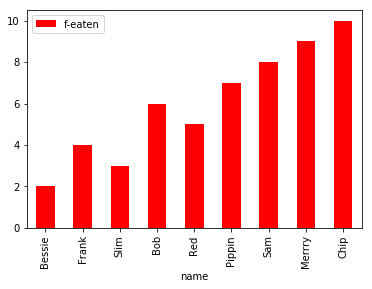

In [22]:
colors = {'A': 'r', 'B': 'b', 'C': 'g'}
cols = [colors[i] for i in data['f-type']]
data.set_index('name').plot(kind='bar', color=data['f-type'].map(colors))
data['f-type'].map(colors)

In [5]:
grand_mean = data['f-eaten'].mean()
grand_mean

6.0

In [6]:
# means for each group
means = data.groupby('f-type').mean()
means

,f-eaten
f-type,
A,3
B,6
C,9


In [7]:
ss_between = means.assign(
    dev= means.count() * (means - grand_mean) ** 2
)['dev'].sum()
ss_between

54.0

In [8]:
# squared deviations from the mean
sq = (data['f-eaten'] - data['f-type'].map(means['f-eaten'])) ** 2
ss_within = sq.sum()
ss_within

6

In [9]:
# degrees of freedom
grouped = data.groupby('f-type')
df_between = grouped.ngroups - 1
df_within = data.shape[0] - grouped.ngroups
df_between, df_within

(2, 6)

In [10]:
ms_between = ss_between / df_between
ms_within = ss_within / df_within

ms_between, ms_within

(27.0, 1.0)

In [11]:
F = ms_between / ms_within
F

27.0

In [12]:
F_crit = 5.1433
# reject null?
F > F_crit

True

In [13]:
ss_total = ((data['f-eaten'] - grand_mean) ** 2).sum()
ss_total

60.0

By **rejecting the null** we know that **at least 2** samples differ from each other.

We don't know which ones are different though. Therefore we need to do *additional testing*.

This additional testing is called **multiple comparison test**.

Most commont one is **Tuckey's Honestly Significant Difference (HSD)**.

Tukey's HSD = q* sqrt(MS_within / n)

Link to [Studentized Range Statistic (q) Table](https://www2.stat.duke.edu/courses/Spring98/sta110c/qtable.html)

In [14]:
q = 4.34 # from table
tukey_hsd = q * np.sqrt(ms_within / means.shape[0]) 
tukey_hsd

2.5057001682829756

This means that if any 2 samples have absolute difference greater than 2.51 the difference is considered **significantly different**.

In [15]:
means.loc['A'] - means.loc['B']

f-eaten   -3
dtype: int64

In [16]:
means.loc['B'] -  means.loc['C']

f-eaten   -3
dtype: int64

In [17]:
means.loc['A'] - means.loc['C']

f-eaten   -6
dtype: int64

**All** 3 samples are significantly different (all differences are greater than Tukey's HSD =  2.51)

In [18]:
from itertools import combinations
for s1, s2 in combinations(means.index, 2):
    cohen_d = (means.loc[s1]['f-eaten'] - means.loc[s2]['f-eaten']) / np.sqrt(ms_within)
    print(f'{s1} - {s2} = {cohen_d}')

A - B = -3.0
A - C = -6.0
B - C = -3.0


In [19]:
eta_squared = ss_between / ss_total
eta_squared

0.90000000000000002